<a href="https://colab.research.google.com/github/codml/AI_jupyter/blob/main/chapter_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.6174 - accuracy: 0.8151 - val_loss: 0.2756 - val_accuracy: 0.9178
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2544 - accuracy: 0.9214 - val_loss: 0.2099 - val_accuracy: 0.9394
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1702 - accuracy: 0.9477 - val_loss: 0.2085 - val_accuracy: 0.9382
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1218 - accuracy: 0.9618 - val_loss: 0.1405 - val_accuracy: 0.9578
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0899 - accuracy: 0.9723 - val_loss: 0.1362 - val_accuracy: 0.9617
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0663 - accuracy: 0.9794 - val_loss: 0.1349 - val_accuracy: 0.9607
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0508 - accuracy: 0.9832 - val_loss: 0.1398 - val_accuracy: 0.9603
Epoch 

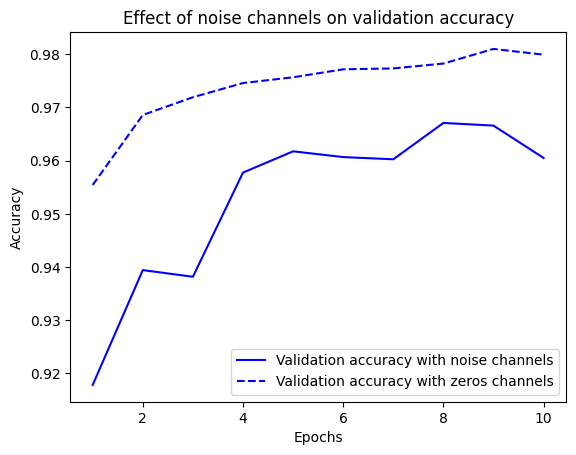

In [4]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
train_images_with_noise_channels = np.concatenate([
    train_images, np.random.random((len(train_images), 784))
], axis=1)
train_images_with_zeros_channels = np.concatenate([
    train_images, np.zeros((len(train_images), 784))
], axis=1)

from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

import matplotlib.pyplot as plt

val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, 'b-',
         label='Validation accuracy with noise channels')
plt.plot(epochs, val_acc_zeros, 'b--',
         label='Validation accuracy with zeros channels')
plt.title('Effect of noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3142 - accuracy: 0.1026 - val_loss: 2.3037 - val_accuracy: 0.1078
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2988 - accuracy: 0.1145 - val_loss: 2.3074 - val_accuracy: 0.1061
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2905 - accuracy: 0.1278 - val_loss: 2.3180 - val_accuracy: 0.0995
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2790 - accuracy: 0.1392 - val_loss: 2.3270 - val_accuracy: 0.1016
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2651 - accuracy: 0.1493 - val_loss: 2.3345 - val_accuracy: 0.1005
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2456 - accuracy: 0.1646 - val_loss: 2.3509 - val_accuracy: 0.0984
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2223 - accuracy: 0.1796 - val_loss: 2.3590 - val_accuracy: 0.0974

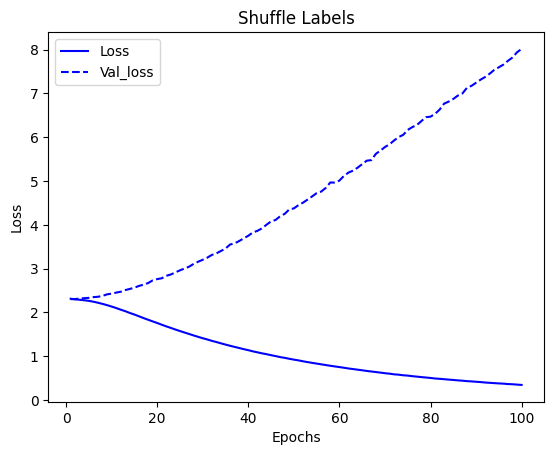

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 101)
plt.plot(epochs, loss, 'b-',
         label='Loss')
plt.plot(epochs, val_loss, 'b--',
         label='Val_loss')
plt.title('Shuffle Labels')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



```
num_validation_samples = 10000
np.random.shuffle(data)
validation_data = data[:num_validation_samples]
training_data = data[num_validation_samples:]
model = get_model()
model.fit(training_data, ...)
validation_score = model.evaluate(validation_data, ...)
... <- 모델 튜닝, 훈련, 평가
model=get_model()
model.fit(np.concatenate([training_data,
        validation_data]), ...)
test_score = model.evaluate(test_data, ...)
```









```
k = 3
num_validation_samples = len(data) // k
np,random.shuffle(data)
validation_scores = []
for fold in range(k):
    validation_data = data[num_validation_samples*fold:
        num_validation_samples*(fold+1)]
    training_data = np.concatenate(
        data[:num_validation_samples*fold],
        data[num_validation_samples*(fold+1):])
    model=get_model()
    model.fit(training_data, ...)
    validation_score = model.evaluate(validation_data, ...)
    validation_scores.append(validation_score)
    validation_score = np.average(validation_scores)
model = get_model()
model.fit(data, ...)
test_score = model.evaluate(test_data, ...)
```



In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 688.5133 - accuracy: 0.4436 - val_loss: 44.5886 - val_accuracy: 0.2716
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 4.1867 - accuracy: 0.2421 - val_loss: 2.2956 - val_accuracy: 0.2352
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5135 - accuracy: 0.2484 - val_loss: 2.0943 - val_accuracy: 0.2768
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4649 - accuracy: 0.2409 - val_loss: 2.7401 - val_accuracy: 0.2503
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3833 - accuracy: 0.2191 - val_loss: 2.3328 - val_accuracy: 0.2430
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4998 - accuracy: 0.2082 - val_loss: 2.6545 - val_accuracy: 0.2033
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 2.4332 - accuracy: 0.2021 - val_loss: 2.2564 - val_accuracy: 0.2154
Epo

In [7]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 0.3628 - accuracy: 0.9104 - val_loss: 0.1438 - val_accuracy: 0.9585
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1258 - accuracy: 0.9649 - val_loss: 0.1467 - val_accuracy: 0.9643
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0983 - accuracy: 0.9739 - val_loss: 0.1239 - val_accuracy: 0.9702
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0779 - accuracy: 0.9794 - val_loss: 0.1538 - val_accuracy: 0.9700
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0707 - accuracy: 0.9829 - val_loss: 0.1472 - val_accuracy: 0.9717
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0641 - accuracy: 0.9841 - val_loss: 0.1635 - val_accuracy: 0.9750
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0544 - accuracy: 0.9872 - val_loss: 0.2178 - val_accuracy: 0.9692
Epoch 

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6766 - accuracy: 0.8336 - val_loss: 0.3622 - val_accuracy: 0.9034
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3541 - accuracy: 0.9024 - val_loss: 0.3121 - val_accuracy: 0.9116
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3185 - accuracy: 0.9113 - val_loss: 0.2943 - val_accuracy: 0.9172
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3021 - accuracy: 0.9159 - val_loss: 0.2870 - val_accuracy: 0.9190
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2925 - accuracy: 0.9183 - val_loss: 0.2789 - val_accuracy: 0.9222
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2856 - accuracy: 0.9205 - val_loss: 0.2763 - val_accuracy: 0.9247
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2809 - accuracy: 0.9215 - val_loss: 0.2725 - val_accuracy: 0.9251
Epoch 

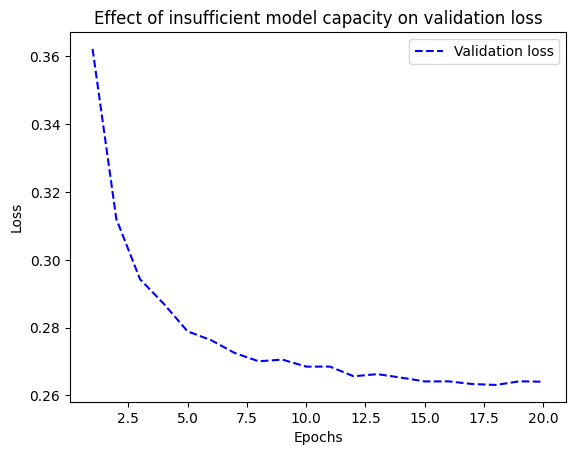

In [8]:
model = keras.Sequential([layers.Dense(10, activation='softmax')])
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2
)
import matplotlib.pyplot as plt

val_loss = history_small_model.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_loss, 'b--',
         label='Validation loss')
plt.title('Effect of insufficient model capacity on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
375/375 [==============================] - 3s 4ms/step - loss: 0.3690 - accuracy: 0.8967 - val_loss: 0.2154 - val_accuracy: 0.9351
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1650 - accuracy: 0.9515 - val_loss: 0.1420 - val_accuracy: 0.9600
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1167 - accuracy: 0.9658 - val_loss: 0.1246 - val_accuracy: 0.9630
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0891 - accuracy: 0.9735 - val_loss: 0.1049 - val_accuracy: 0.9701
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0709 - accuracy: 0.9785 - val_loss: 0.0974 - val_accuracy: 0.9725
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0578 - accuracy: 0.9822 - val_loss: 0.0929 - val_accuracy: 0.9716
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0490 - accuracy: 0.9851 - val_loss: 0.0951 - val_accuracy: 0.9736
Epoch 

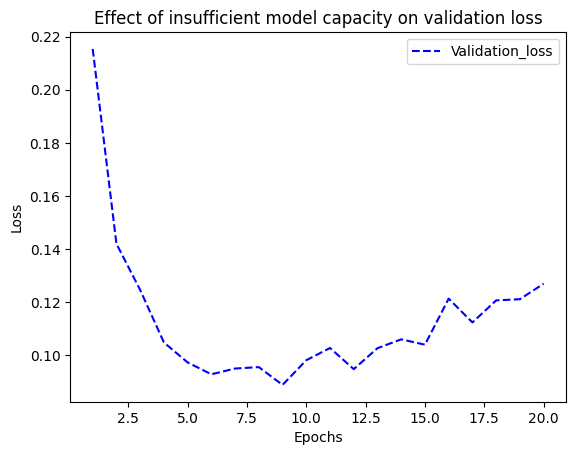

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation='relu'),
    layers.Dense(96, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2
)

import matplotlib.pyplot as plt

val_loss = history_small_model.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_loss, 'b--',
         label='Validation_loss')
plt.title('Effect of insufficient model capacity on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.5407 - accuracy: 0.7733 - val_loss: 0.4209 - val_accuracy: 0.8616
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3388 - accuracy: 0.8889 - val_loss: 0.3267 - val_accuracy: 0.8783
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2507 - accuracy: 0.9155 - val_loss: 0.2877 - val_accuracy: 0.8858
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2028 - accuracy: 0.9302 - val_loss: 0.2905 - val_accuracy: 0.8824
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1721 - accuracy: 0.9415 - val_loss: 0.2896 - val_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1480 - accuracy: 0.9517 - val_loss: 0.2850 - val_accuracy: 0.8883
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1247 - accuracy: 0.9597 - val_loss: 0.2962 - val_accuracy: 0.8872
Epoch 8/20
30

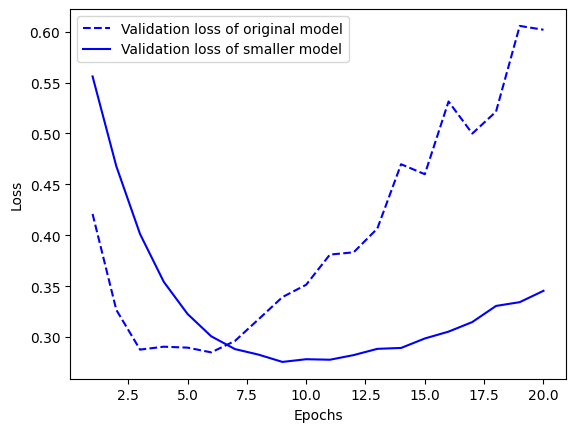

In [15]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=["accuracy"])
history_original = model.fit(x_train,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)
model=keras.Sequential([
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_smaller_model = model.fit(
    x_train, train_labels,
    epochs=20, batch_size=512, validation_split=0.4
)
history_origin=history_original.history['val_loss']
history_small=history_smaller_model.history['val_loss']
epochs=range(1, 20+1)
plt.plot(epochs, history_origin, 'b--',
         label='Validation loss of original model')
plt.plot(epochs, history_small, 'b-',
         label='Validation loss of smaller model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
30/30 [==============================] - 4s 86ms/step - loss: 0.5657 - accuracy: 0.7423 - val_loss: 0.7294 - val_accuracy: 0.6436
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3317 - accuracy: 0.8617 - val_loss: 0.2807 - val_accuracy: 0.8835
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2385 - accuracy: 0.9075 - val_loss: 0.2850 - val_accuracy: 0.8804
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1926 - accuracy: 0.9269 - val_loss: 0.3154 - val_accuracy: 0.8663
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1394 - accuracy: 0.9500 - val_loss: 0.3322 - val_accuracy: 0.8769
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1139 - accuracy: 0.9570 - val_loss: 0.3263 - val_accuracy: 0.8714
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0757 - accuracy: 0.9768 - val_loss: 0.3555 - val_accuracy: 0.8822
Epoch 8/20
30

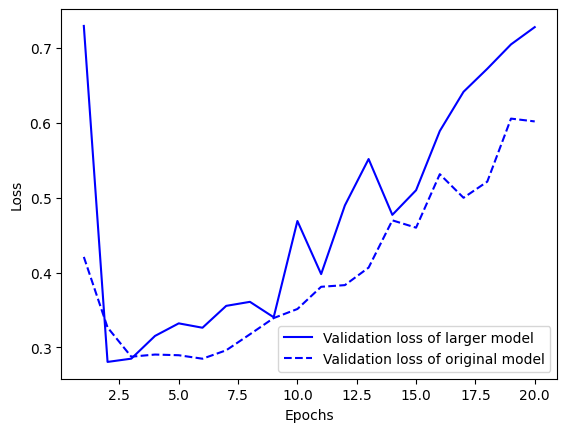

In [17]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_larger_model = model.fit(
    x_train, train_labels,
    epochs=20, batch_size=512, validation_split=0.4
)

history_large = history_larger_model.history['val_loss']
plt.clf()
plt.plot(epochs, history_large, 'b-',
         label='Validation loss of larger model')
plt.plot(epochs, history_origin, 'b--',
         label='Validation loss of original model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
30/30 [==============================] - 3s 70ms/step - loss: 0.6303 - accuracy: 0.7786 - val_loss: 0.5126 - val_accuracy: 0.8619
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4389 - accuracy: 0.8893 - val_loss: 0.4154 - val_accuracy: 0.8800
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3610 - accuracy: 0.9059 - val_loss: 0.3848 - val_accuracy: 0.8817
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3220 - accuracy: 0.9181 - val_loss: 0.3691 - val_accuracy: 0.8854
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2949 - accuracy: 0.9271 - val_loss: 0.3745 - val_accuracy: 0.8797
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2828 - accuracy: 0.9310 - val_loss: 0.3628 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2683 - accuracy: 0.9371 - val_loss: 0.3629 - val_accuracy: 0.8861
Epoch 8/20
30

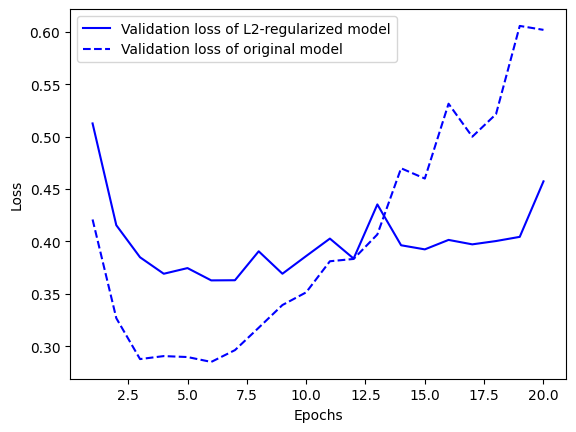

In [18]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation='relu'),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_ls_reg = model.fit(
    x_train, train_labels,
    epochs=20, batch_size=512, validation_split=0.4
)

history_ls = history_ls_reg.history['val_loss']
plt.clf()
plt.plot(epochs, history_ls, 'b-',
         label='Validation loss of L2-regularized model')
plt.plot(epochs, history_origin, 'b--',
         label='Validation loss of original model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
30/30 [==============================] - 4s 67ms/step - loss: 0.6032 - accuracy: 0.6734 - val_loss: 0.4816 - val_accuracy: 0.8534
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4716 - accuracy: 0.7977 - val_loss: 0.3885 - val_accuracy: 0.8589
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3971 - accuracy: 0.8449 - val_loss: 0.3293 - val_accuracy: 0.8821
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3383 - accuracy: 0.8813 - val_loss: 0.3038 - val_accuracy: 0.8857
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3045 - accuracy: 0.9014 - val_loss: 0.3083 - val_accuracy: 0.8798
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2633 - accuracy: 0.9172 - val_loss: 0.2842 - val_accuracy: 0.8883
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2345 - accuracy: 0.9281 - val_loss: 0.2833 - val_accuracy: 0.8899
Epoch 8/20
30

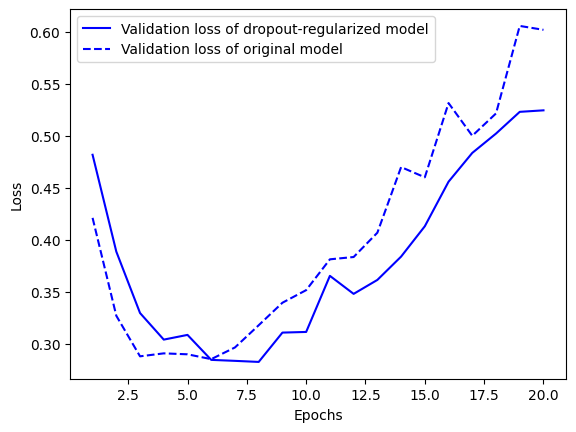

In [19]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_dropout = model.fit(
    x_train, train_labels,
    epochs=20, batch_size=512, validation_split=0.4
)

history_drop = history_dropout.history['val_loss']
plt.clf()
plt.plot(epochs, history_drop, 'b-',
         label='Validation loss of dropout-regularized model')
plt.plot(epochs, history_origin, 'b--',
         label='Validation loss of original model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()